In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv('WHI_Inflation.csv')

# Первичный осмотр данных
print("Размер датасета:", data.shape)
print("\nПервые 5 строк:")
display(data.head())
print("\nИнформация о столбцах:")
print(data.info())
print("\nПропущенные значения:")
print(data.isnull().sum())

Размер датасета: (1232, 16)

Первые 5 строк:


,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                      

In [4]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Заполнение пропусков
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Кодирование категориальных признаков
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Проверка после обработки
print("\nПосле обработки:")
print("Пропущенные значения:", data.isnull().sum().sum())
print("Типы данных:\n", data.dtypes)


После обработки:
Пропущенные значения: 0
Типы данных:
 Country                                     int32
Year                                        int64
Headline Consumer Price Inflation         float64
Energy Consumer Price Inflation           float64
Food Consumer Price Inflation             float64
Official Core Consumer Price Inflation    float64
Producer Price Inflation                  float64
GDP deflator Index growth rate            float64
Continent/Region                            int32
Score                                     float64
GDP per Capita                            float64
Social support                            float64
Healthy life expectancy at birth          float64
Freedom to make life choices              float64
Generosity                                float64
Perceptions of corruption                 float64
dtype: object


In [6]:
possible_target_names = ['Happiness Index', 'Happiness', 'Happiness_Index', 'HI', 'happiness_index']

# Находим правильное название столбца
target_column = None
for name in possible_target_names:
    if name in data.columns:
        target_column = name
        break

if target_column is None:
    # Если ни одно из стандартных названий не подошло, используем последний столбец как целевую переменную
    target_column = data.columns[-1]
    print(f"Целевая переменная не найдена, используем последний столбец: {target_column}")

# Разделение на признаки и целевую переменную
X = data.drop(columns=[target_column])
y = data[target_column]

# Выводим информацию о разделении
print(f"\nЦелевая переменная: {target_column}")
print(f"Признаки: {list(X.columns)}")

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Выводим формы полученных данных
print("\nФормы данных после разделения:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Целевая переменная не найдена, используем последний столбец: Perceptions of corruption

Целевая переменная: Perceptions of corruption
Признаки: ['Country', 'Year', 'Headline Consumer Price Inflation', 'Energy Consumer Price Inflation', 'Food Consumer Price Inflation', 'Official Core Consumer Price Inflation', 'Producer Price Inflation', 'GDP deflator Index growth rate', 'Continent/Region', 'Score', 'GDP per Capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity']

Формы данных после разделения:
X_train: (985, 15), y_train: (985,)
X_test: (247, 15), y_test: (247,)


In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Предсказания
y_pred_lr = lr.predict(X_test_scaled)

# Оценка модели
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Линейная регрессия:")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R2: {r2_lr:.4f}")

Линейная регрессия:
MSE: 0.0084
MAE: 0.0676
R2: 0.3993


In [8]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Предсказания
y_pred_gb = gb.predict(X_test)

# Оценка модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nГрадиентный бустинг:")
print(f"MSE: {mse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R2: {r2_gb:.4f}")


Градиентный бустинг:
MSE: 0.0038
MAE: 0.0447
R2: 0.7296


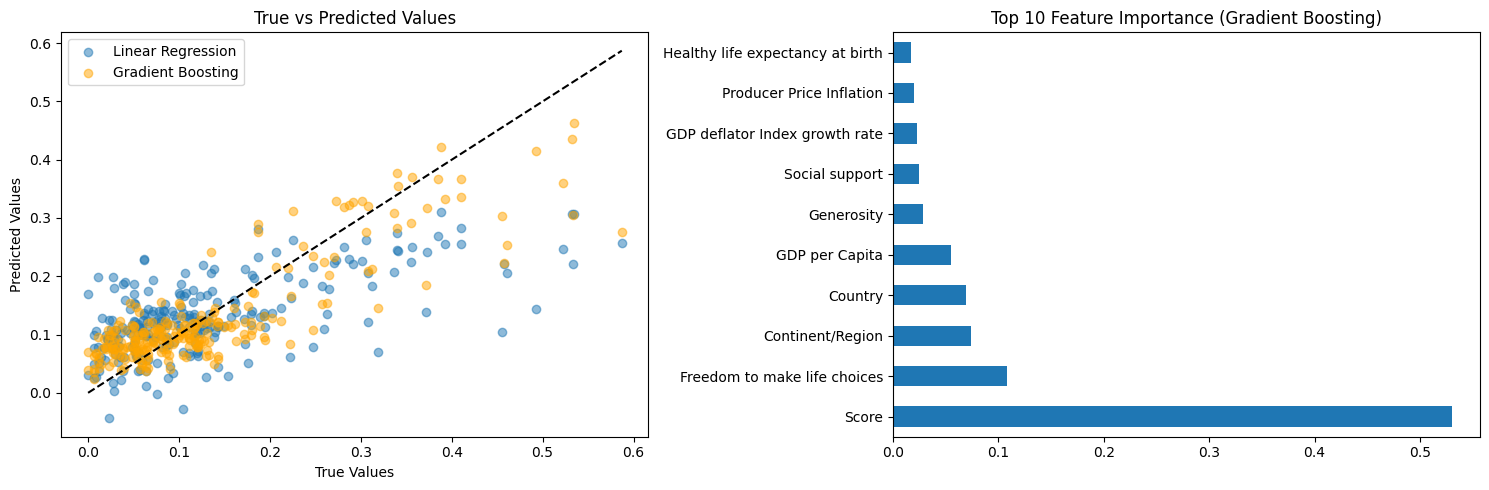

In [9]:
plt.figure(figsize=(15, 5))

# График истинных vs предсказанных значений
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='orange', label='Gradient Boosting')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()

# График важности признаков
plt.subplot(1, 2, 2)
feature_importance = pd.Series(gb.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance (Gradient Boosting)')

plt.tight_layout()
plt.show()

In [10]:
print("\nАнализ результатов:")
print("1. Использованные метрики:")
print("- MSE (Mean Squared Error): измеряет среднюю квадратичную ошибку, чувствительна к выбросам")
print("- MAE (Mean Absolute Error): средняя абсолютная ошибка, более устойчива к выбросам")
print("- R2 (R-squared): доля объясненной дисперсии, показывает насколько хорошо модель объясняет вариацию данных")

print("\n2. Сравнение моделей:")
print(f"- Линейная регрессия показала R2 = {r2_lr:.4f}")
print(f"- Градиентный бустинг показал R2 = {r2_gb:.4f}")
print("Вывод: Градиентный бустинг работает лучше, так как дает более высокий R2 и меньшие ошибки.")

print("\n3. Важные признаки:")
print("Согласно анализу важности признаков в Gradient Boosting, наиболее значимыми являются:")
print(feature_importance.nlargest(5).to_string())


Анализ результатов:
1. Использованные метрики:
- MSE (Mean Squared Error): измеряет среднюю квадратичную ошибку, чувствительна к выбросам
- MAE (Mean Absolute Error): средняя абсолютная ошибка, более устойчива к выбросам
- R2 (R-squared): доля объясненной дисперсии, показывает насколько хорошо модель объясняет вариацию данных

2. Сравнение моделей:
- Линейная регрессия показала R2 = 0.3993
- Градиентный бустинг показал R2 = 0.7296
Вывод: Градиентный бустинг работает лучше, так как дает более высокий R2 и меньшие ошибки.

3. Важные признаки:
Согласно анализу важности признаков в Gradient Boosting, наиболее значимыми являются:
Score                           0.530505
Freedom to make life choices    0.107914
Continent/Region                0.074420
Country                         0.069062
GDP per Capita                  0.055194
